In [1]:
import gym 
from inventory.envs.inventory_env import Inventory
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [2]:
# abstract model class, will likely edit/add more functionality later in project
class Model(ABC):
    def __init__(self, env):
        self.env = env
        
    @abstractmethod
    def act(self, s):
        pass

# implements model with random policy
class RandomModel(Model):
    def act(self, s):
        return self.env.action_space.sample()

# implements model with constant order policy where r is always amount ordered
class ConstantModel(Model):
    def __init__(self, env, r):
        self.env = env
        self.r = r
        
    def act(self, s):
        return np.array([self.r])
        

def evaluate(model, env, n_episodes):
    avg_reward = np.zeros((n_episodes, T))
    for i in range(n_episodes):   
        done = False
        env.reset()
        reward_sum = 0
        t = 0
        obs = env.state
        while not done:
            action = model.act(obs)
            obs, reward, done, info = env.step(action)
            reward_sum = reward_sum + reward
            avg_reward[i,t] = (reward_sum)*T/(t+1)
            t = t + 1
    
    plt.xlabel("Time Horizon")
    plt.ylabel("Mean Long Run Average Cost (over " + str(n_episodes) + " episodes)")
    plt.plot(-np.mean(avg_reward, axis=0))
    mean = -np.mean(avg_reward[:,-1])
    std = np.std(avg_reward[:,-1])
    return mean, std

In [3]:
T = 100000 # episode length
env = Inventory(length=T) # create  the  inventory  network  environment  with default parameters and specified episode length
n_episodes = 100 # number  of  episodes  to  run

(0.7319542972706146, 0.002972184074774446)

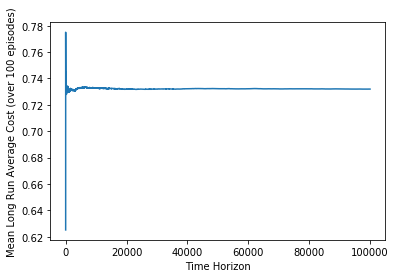

In [4]:
# optimal constant order policy, we know from theory should have value of about .732

# let lambda = p = h = L = 1
# then the optimal constant order policy has r_inf = 1 - srt(1/3) (approx .423)
# and the optimal constant order policy has a long run average cost of
#   C(pi_{r_inf}) = sqrt(3) - 1 (approx .732)

r = 1-(1/3)**(1/2) # optimal constant order amount
## Try also: r = 10 (to see results from policy with infinite long run average cost)
constant = ConstantModel(env, r)
evaluate(constant, env, n_episodes)

(247.66151261588243, 145.65042259818412)

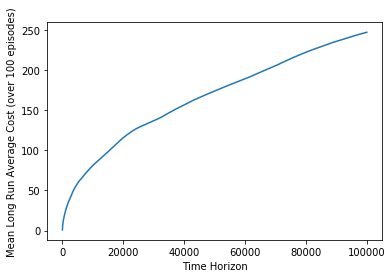

In [5]:
# random policy, value unknown

random = RandomModel(env)
evaluate(random, env, n_episodes)